In [ ]:
import io, os, sys
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

INF = 1 << 30
class Dinic:
  def __init__(self, n):
    self.lvl = [0] * n
    self.ptr = [0] * n
    self.q = [0] * n
    self.adj = [[] for _ in range(n)]

  def add_edge(self, a, b, c, rcap=0):
    self.adj[a].append([b, len(self.adj[b]), c, 0])
    self.adj[b].append([a, len(self.adj[a]) - 1, rcap, 0])

  def dfs(self, v, t, f):
    if v == t or not f:
      return f

    for i in range(self.ptr[v], len(self.adj[v])):
      e = self.adj[v][i]
      if self.lvl[e[0]] == self.lvl[v] + 1:
        p = self.dfs(e[0], t, min(f, e[2] - e[3]))
        if p:
          self.adj[v][i][3] += p
          self.adj[e[0]][e[1]][3] -= p
          return p
      self.ptr[v] += 1

    return 0

  def calc(self, s, t):
    flow, self.q[0] = 0, s
    for l in range(31):
      while True:
        self.lvl, self.ptr = [0] * len(self.q), [0] * len(self.q)
        qi, qe, self.lvl[s] = 0, 1, 1
        while qi < qe and not self.lvl[t]:
          v = self.q[qi]
          qi += 1
          for e in self.adj[v]:
            if not self.lvl[e[0]] and (e[2] - e[3]) >> (30 - l):
              self.q[qe] = e[0]
              qe += 1
              self.lvl[e[0]] = self.lvl[v] + 1

        p = self.dfs(s, t, INF)
        while p:
          flow += p
          p = self.dfs(s, t, INF)

        if not self.lvl[t]:
          break

    return flow

def sol(): 
  N, M = map(int, input().split())
  V = N * M + 2
  src = V - 2
  snk = V - 1
  C = Dinic(V)
  G = [[*map(int, input().split())] for _ in range(N)]

  idx = lambda x, y: x * M + y
  for r, l in enumerate(G) :
    for c, v in enumerate(l) :
      chk = (r+c) % 2 #체크 문양 flag
      if chk :
        C.add_edge(src, idx(r, c), v)
        for dr, dc in ((0, 1), (0, -1), (1, 0), (-1, 0)) :
          nr, nc = r + dr, c + dc
          if not (0 <= nr < N and 0 <= nc < M) : continue
          C.add_edge(idx(r, c), idx(nr, nc), INF)
      else :
        C.add_edge(idx(r, c), snk, v)
    
  Gsum = sum(map(sum, G))
  res = C.calc(src, snk) #최대유량의 의미 => 선택한 격자가 둘다 양수인 경우를 가장 효율적으로 짝지은 쌍의 수 => (최적쌍)이라고 부를 때
  #필요한 최소 연산의 횟수 = (최적쌍) + (짝지어지지 못한 수의 합)
  #Gsum = (최적쌍) * 2 + (짝지어지지 못한 수의 합) 이므로
  sys.stdout.write(str(Gsum - res) + "\n")

for _ in range(int(input())):
  sol()

### 풀이
- 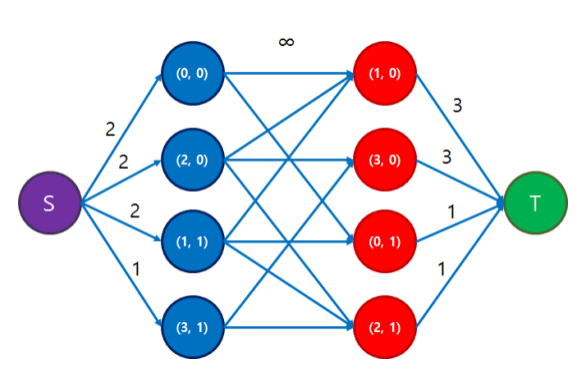
  - 정점 연결은 위와 같이 한다.
- 매칭의 의미는 주석을 참고. 그렇게 해서 정답을 구한다.
- 체크무늬에서 인접한 정점을 연결할 때, 양쪽 체크무늬 중 하나만 연결해야 했다...